# Practica 5 Morfología y Extracción de Características

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph
from skimage.morphology import skeletonize, skeletonize_3d
from skimage.data import binary_blobs
import skimage.color as color
import cv2

A continuación se presentan una serie de ejercicios de carácter calificable.

<br> Deben realizarse en los grupos de trabajo asignados y subirse al GitHub respectivo </br>

No es necesario concluir, pero deben presentarse las respuestas de forma <b> ordenada </b>

## Fecha límite de entrega: Jueves 8 de agosto a media noche.

# 1.

Lea la imagen "res/jirafa.png" y realice:

1. Extracción de bordes mediante erosión y dilatación.


C:\anaconda\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


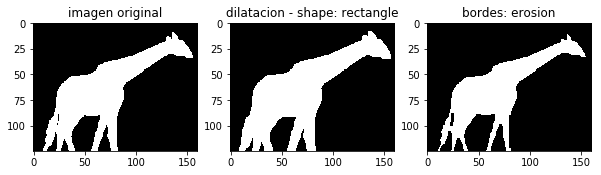

In [2]:

#Crear máscaras
selem = morph.rectangle(3,3)


#Leer imagen de entrada y binarizarla
img = skimage.io.imread("res/jirafa.png", as_grey=True)
img = img > 0 #forma binarizar la imagen de entrada

#Aplicar una dilatación con la máscara de diamante
dilatacion = morph.binary_dilation(img,selem)

erosion1 = morph.binary_erosion(img,selem)

#Crear subplot 1x3 que muestre figura original, dilatada y con bordes extraídos
fig, ax = plt.subplots(1,3, figsize=(10, 7))
ax[0].set_title('imagen original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('dilatacion - shape: rectangle')
ax[1].imshow(dilatacion, cmap='gray')
ax[2].set_title('bordes: erosion')
ax[2].imshow(erosion1, cmap='gray')

2. Extracción de bordes mediante la función gradiente.


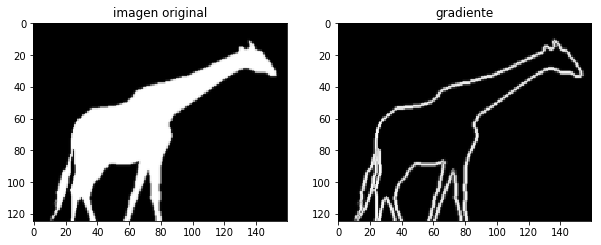

In [3]:
img = cv2.imread("res/jirafa.png")



elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))


gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, elKernel)


gradiente = cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2, figsize=(10, 7))
ax[0].set_title('imagen original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('gradiente')
ax[1].imshow(gradient, cmap='gray')


3. Extracción de bordes mediante la operación XOR entre dilatación y erosión.

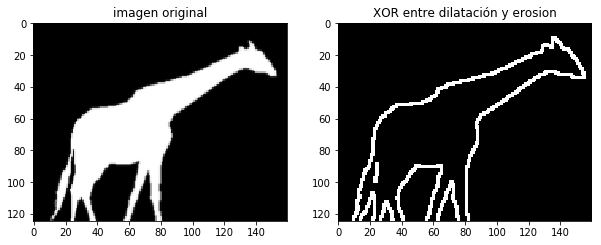

In [4]:
fig, ax = plt.subplots(1,2, figsize=(10, 7))
ax[0].set_title('imagen original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('XOR entre dilatación y erosion')
ax[1].imshow(np.logical_xor(dilatacion,erosion1), cmap='gray')

# 2.

<br> Lea la imagen "res/silueta.png" y obsérvela cuidadosamente. </br>
<br> Lea también, la imagen "res/silueta2.png" y repita el proceso. </br>
<br> Las imágenes tienen dos tipos de ruido distintos colocados con una serie de cuidadosas operaciones hechas en paint </br>

Utilice morfologías de  apertura y cierre (escogiendo la máscara adecuada) para eliminar el ruido sin afectar demasiado la silueta de la jirafa.

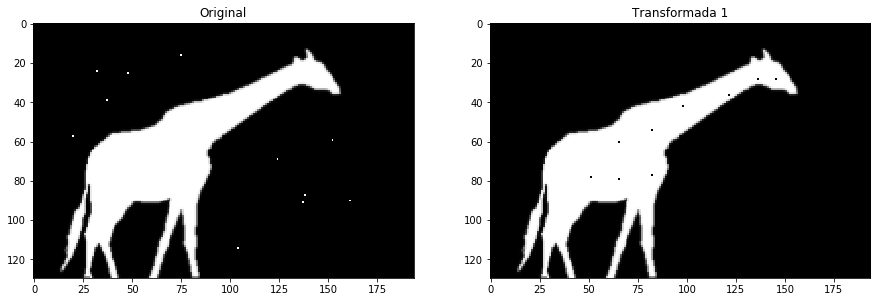

In [5]:
silueta1 = skimage.io.imread('res/silueta.png', as_grey=True)

silueta2 = skimage.io.imread('res/silueta2.png', as_grey=True)

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Original')
ax1.imshow(silueta1,cmap='gray')
ax2.set_title('Transformada 1')
ax2.imshow(silueta2,cmap='gray')

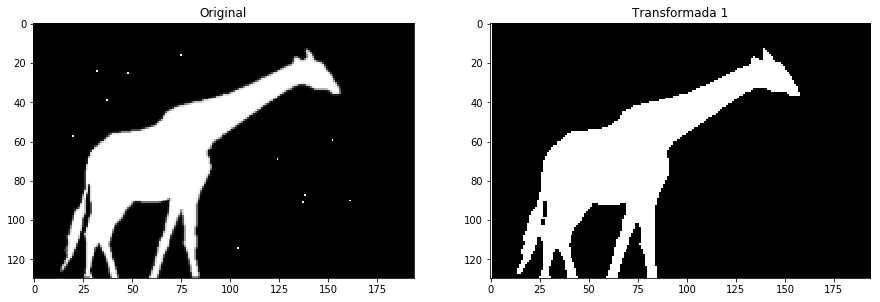

In [6]:
kernel = np.ones((2,2),np.uint8)

erosion = morph.binary_erosion(silueta1,kernel)

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Original')
ax1.imshow(silueta1,cmap='gray')
ax2.set_title('Transformada 1')
ax2.imshow(erosion,cmap='gray')

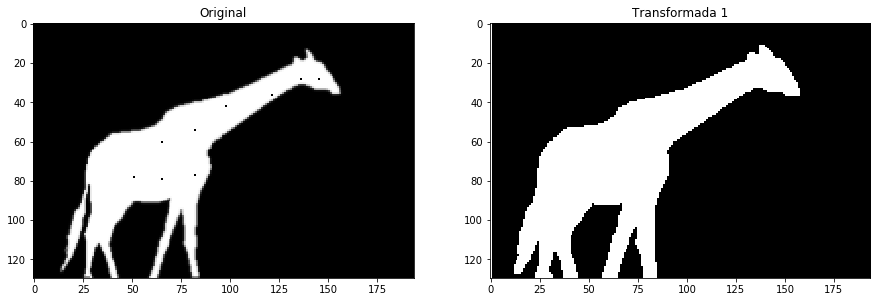

In [7]:
kernel = np.ones((2,2),np.uint8)

dilatacion = morph.binary_dilation(silueta2,kernel)

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Original')
ax1.imshow(silueta2,cmap='gray')
ax2.set_title('Transformada 1')
ax2.imshow(dilatacion,cmap='gray')

# 3.

1. Lea la imagen "res/jirafa.png" en escala de grises.

Realice un etiquetado de regiones escogiendo la máscara correcta (no necesariamente un rectángulo, prueba un disco o la identidad).

<img src = "res/etiq.png">

<center><i>Figura: Solución aproximada</i></center>

Imprima el número de etiquetas (Debe ser 1)

2. Ya que ha leido la imagen "res/jirafa.png" utilice el método de esqueletización de Zhang para obtener el esqueleto de ésta imagen (recuerde que es una imagen binaria).

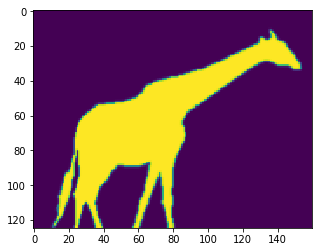

In [8]:
jirafa = skimage.io.imread('res/jirafa.png', as_grey=True)
plt.imshow(jirafa)

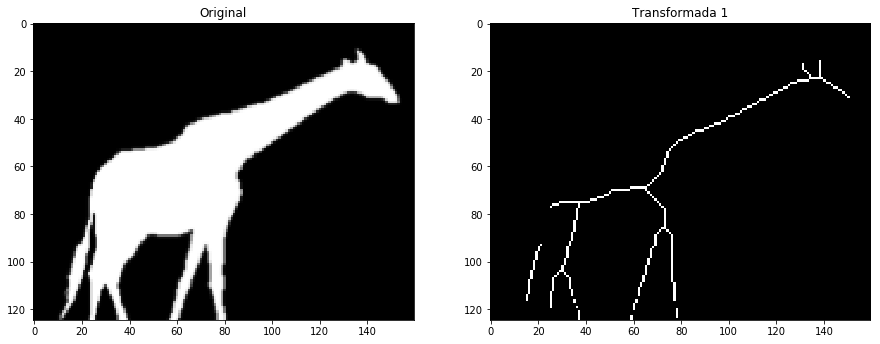

In [9]:
skeleton = skeletonize(jirafa)
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Original')
ax1.imshow(jirafa,cmap='gray')
ax2.set_title('Transformada 1')
ax2.imshow(skeleton,cmap='gray')


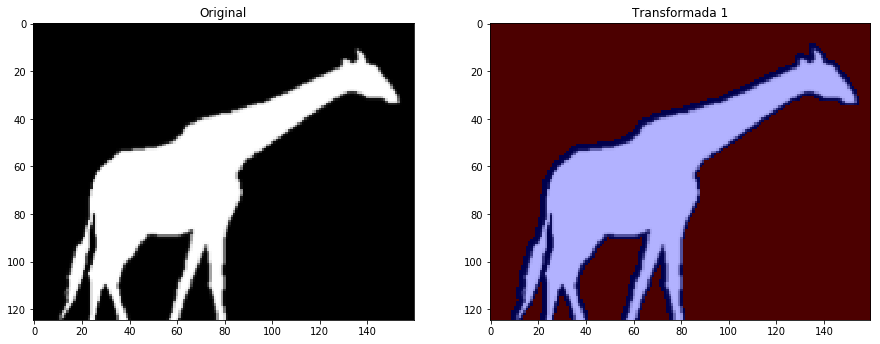

In [10]:
selem = morph.rectangle(13,13)

dilatacion = morph.binary_dilation(jirafa,kernel)

labels, num_labels = morph.label(dilatacion, neighbors=4, return_num=True, connectivity= 1)

image_label_overlay = color.label2rgb(labels, image=jirafa)

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Original')
ax1.imshow(jirafa,cmap='gray')
ax2.set_title('Transformada 1')
ax2.imshow(image_label_overlay,cmap='gray')

In [11]:
num_labels

1

## No olvide revisar el Pipeline de segmentación que se encuentra en el notebook de la clase 8.

# 4.

Cree una imagen de ceros (np.zeros()) de 600x600, posteriormente un cuadrado de 100x100, cuyo <i>start</i> está en la coordenada [200,200] (Utilice la función rectangle de skimage, es un proceso análogo a dibujar la elipse)


<img src = "res/pis.png">

<center><i>Figura: Cuadrado</i></center>

Una vez tenga la imagen anterior, realice los siguientes pasos (Debe realizar UN SOLO PLOT POR CADA NUMERAL listado a continuación)

1. Plotee el cuadrado que creó, imprima el área y el perímetro respectivos.
2. Imprima el cuadrado con el centroide, adicionalmente imprima las coordenadas del centroide.
3. Imprima el cuadrado rodeado por el rectángulo más pequeño que lo rodea (si quiere puede mostrarlo con el centroide)
4. Muestre las distancias respecto al contorno.
5. Imprima el cuadrado con el centroide y el contorno, junto a la medida entre el contorno y el centroide.
6. ¿Cuál es el diámetro equivalente? imprímalo.
7. Imprima los momentos de HU y sus logaritmos.

# 5.

Lea la imagen "res/cancer.bmp" y la máscara "res/lesion.bmp", utilice los algoritmos de extracción de características para encontrar los estadísticos de primer y segundo orden de esta imagen. Preste especial atención a este proceso individual, puesto que en el ejercicio guiado lo hará para varias imágenes.

**Estadisticos de Primer Orden**

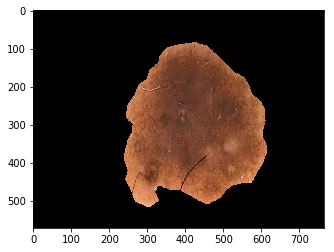

In [16]:
from scipy.stats import kurtosis
from scipy.stats import skew

#Definir funciones de conversión de imágenes de un canal a otro, de
#correción de BGR a RGB, y pasar a escala de grises
def bgr_to_gray(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

def rgb_to_gray(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

def bgr_to_rgb(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


def rgb_to_lab(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2LAB)


def rgb_to_hsv(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2HSV)


#Definir la función para obtener características del espacio LAB y HSV
def get_lab_hsv_features(im, mask, features):
    #La imagen de entrada debe estar en el espacio RGB
    #Extraer el tamaño de la imagen de entrada y convertirla a LAB y HSV
    shape = np.shape(im)
    im_lab = rgb_to_lab(im)
    im_hsv = rgb_to_hsv(im)
    
    #Definir los canales l,a,b por separado
    l = im_lab[:,:,0]
    s = im_hsv[:,:,1]
    v = im_hsv[:,:,2]
    #Definir listas vacías de canales h,s,v
    h_1 = []
    s_1 = []
    v_1 = []
    
    #Recorrer cada posición i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array verdadero añadir
            #a cada canal del nuevo HSV el píxel en esta posición
            if((mask[i][j] == np.array([True, True, True])).all() ):
                h_1.append(l[i][j])
                s_1.append(s[i][j])
                v_1.append(v[i][j])
                
    #Utilizar features para guardar los valores de media, desviación estándar, kurtosis y sesgo
    #de cada uno de los canales h_1, s_1, v_1
    features['h_mean'] = np.mean(h_1)
    features['h_std'] = np.std(h_1)
    features['h_kurtosis'] = kurtosis(h_1)
    features['h_skew'] = skew(h_1)
    features['s_mean'] = np.mean(s_1)
    features['s_std'] = np.std(s_1)
    features['v_kurtosis'] = kurtosis(v_1)
    features['v_skew'] = skew(v_1)
    features['v_mean'] = np.mean(v_1)
    features['v_std'] = np.std(v_1)
    features['s_kurtosis'] = kurtosis(s_1)
    features['s_skew'] = skew(s_1)
    return features

#Definir función para extraer características del espacio RGB
def get_rgb_features(im,mask, features):
    #Crear una matriz del mismo tamaño de la imagen de entrada, leer los canales R,G,B y 
    #crear listas vacías donde se aplica la máscara
    shape = np.shape(im)
    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]
    r_1 = []
    g_1 = []
    b_1 = []
    #Recorrer las posiciones i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array de True, añadir
            #a cada canal del nuevo espacio RGB el píxel en esta posición
            if( (mask[i][j] == np.array([True, True, True])).all() ): 
                r_1.append(r[i][j])
                g_1.append(g[i][j])
                b_1.append(b[i][j])
    #Utilizar features para guardar los valores de media, desv.estandar, kurtosis y sesgo
    #de los canales r_1,g_1,b_1
    features['r_mean'] = np.mean(r_1)
    features['r_std'] = np.std(r_1)
    features['r_kurtosis'] = kurtosis(r_1)
    features['r_skew'] = skew(r_1)
    features['g_mean'] = np.mean(g_1)
    features['g_std'] = np.std(g_1)
    features['b_kurtosis'] = kurtosis(b_1)
    features['b_skew'] = skew(b_1)
    features['b_mean'] = np.mean(b_1)
    features['b_std'] = np.std(b_1)
    features['g_kurtosis'] = kurtosis(g_1)
    features['g_skew'] = skew(g_1)
    return features

#Función de extracción de características de los canales rgb, lab-hsv
def features_pipeline(img, mask, orden = 1):
    features = {}
    if orden == 1:
        features = get_rgb_features(img,mask,features)
        features = get_lab_hsv_features(img,mask,features)
    elif orden == 2:
        img_gray = rgb_to_gray(img)
        features = get_glcm_features(img_gray, features)
        
    return features

#Leer imagen de entrada, una máscara de entrada binarizada
img = cv2.cvtColor(cv2.imread("res/cancer.bmp"),cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread("res/lesion.bmp"),cv2.COLOR_BGR2RGB)
mask = mask > 128

#Multiplicar imagen de entrada por la máscara
img = img*(mask)

#Invocar el diccionario de características
features = features_pipeline(img, mask)
plt.imshow(img)


In [17]:
features # Estadisticos de primer orden

{'r_mean': 146.88798263992817,
 'r_std': 35.676723632034886,
 'r_kurtosis': -0.6618763570862356,
 'r_skew': 0.4596421888251554,
 'g_mean': 85.67200438990322,
 'g_std': 25.688268030627587,
 'b_kurtosis': 1.5539723268111416,
 'b_skew': 1.0231220419543297,
 'b_mean': 56.100136353054644,
 'b_std': 18.35799542951593,
 'g_kurtosis': 0.09600887736926511,
 'g_skew': 0.7703928843347255,
 'h_mean': 108.89899896903788,
 'h_std': 28.421799819402565,
 'h_kurtosis': -0.3828987716618122,
 'h_skew': 0.5696058902117508,
 's_mean': 158.28866939372776,
 's_std': 16.33175866436164,
 'v_kurtosis': -0.6618763570862356,
 'v_skew': 0.4596421888251554,
 'v_mean': 146.88798263992817,
 'v_std': 35.676723632034886,
 's_kurtosis': 2.8066625028984618,
 's_skew': 0.2393586838215034}

**Estadisticos de Segundo Orden**

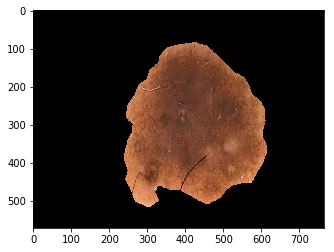

In [18]:
#Importar librerías
from skimage.feature import greycomatrix, greycoprops

#Función de estadísticos de segundo orden
def get_glcm_features(img,features):
    
    #Calcular el nivel co-ocurrente de gris
    glcm = greycomatrix(img, [1,2,3], [0], 256, symmetric=True, normed=True)
    #Calcular la dissimilaridad, contraste, homogeneidad, ASM, energía y correlación, guardar esto en la matriz
    #de features
    features['dissimilarity'] = greycoprops(glcm, 'dissimilarity')[0][0]
    features['contrast'] = greycoprops(glcm, 'contrast')[0][0]
    features['homogeneity'] =greycoprops(glcm, 'homogeneity')[0][0]
    features['ASM'] = greycoprops(glcm, 'ASM')[0][0]
    features['energy'] =greycoprops(glcm, 'energy')[0][0]
    features['correlation'] = greycoprops(glcm, 'correlation')[0][0]
    
    return features


#Invocar diccionario que contiene las características de segundo orden de la imagen
features = features_pipeline(img, mask, orden =2)

#Mostrar la imagen
plt.imshow(img)

In [19]:
features

{'dissimilarity': 1.8544694833961843,
 'contrast': 67.12028155090984,
 'homogeneity': 0.7737342141687925,
 'ASM': 0.523735789907459,
 'energy': 0.7236959236498841,
 'correlation': 0.984931330379283}

# Ejercicio Guiado.

El objetivo de este ejercicio es, mediante 5 imágenes de un dataset de melanomas, mostrar al estudiante cuál es el proceso de extracción de características.

No duden en ir a la carpeta PH2Dataset para observar la información allí consignada, de igual forma las subcarpetas que contienen la imagen a estudiar y sus máscaras.

## Leer estas utilidades, librerías a utilizar y funciones de lectura que necesitaremos para facilitar el trabajo posterior.

In [ ]:
from glob import glob
from abc import ABCMeta, abstractmethod
from os.path import join, splitext, basename, abspath
from os import listdir
from skimage.io import imread
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import math
from skimage import morphology
from skimage.measure import label, regionprops
import cv2
from skimage import measure
from scipy.ndimage import rotate
import math 

%matplotlib inline

warnings.filterwarnings("ignore")

class MissingAttributeException(Exception):
    def __init__(self, attribute):
        super(MissingAttributeException, self).__init__(
            'The <{}> attribute is not contained in the dataset'.format(attribute)
        )


class BaseDataset:
    __metaclass__ = ABCMeta

    def __init__(self, dataset_path):
        self.__dataset_path = abspath(dataset_path)
        self.__image_list = self.load_dataset(self.__dataset_path)
        self.__sample = self.__image_list

    @abstractmethod
    def load_dataset(self, dataset_path):
        '''
        It must return a vector of dictionary in the followed way (keys with * are mandatory):
        image_data = [
                        {
                            'image_filename': <* image filename>,
                            'imageName': <* image name>,
                            'ground_truth_filename': <ground_truth_filename>,
                            'class': <class number the image belong to>,
                            'labels': <vector of string labels associates with the image>
                        },
                        {...}
                    ]
        :param dataset_path: base path for the dataset
        :return: a list of dictionaries containing the dataset information. One entry per image in the dataset
        '''
        return None

    @abstractmethod
    def read_data(self, filename):
        return None

    @abstractmethod
    def has_class(self):
        return False

    @abstractmethod
    def has_labels(self):
        return False

    @abstractmethod
    def has_ground_truth(self):
        return False

    @property
    def image_names(self):
        return [i['imageName'] for i in self.__sample]

    @property
    def num_images(self):
        return len(self.__sample)

    def reset_sample(self):
        self.__sample = self.__image_list

    def set_sample(self, **kwargs):
        if 'percentage' in kwargs:
            p = kwargs['percentage']
            N = len(self.__image_list)
            rn = np.random.rand(N)
            j = np.argsort(rn)[0:int(np.floor(p * N))]
            self.__sample = [self.__image_list[i] for i in j]
        elif 'image_names' in kwargs:
            i_names = kwargs['image_names']
            self.__sample = [data for data in self.__image_list if data['imageName'] in i_names]
        elif 'image_indices' in kwargs:
            image_idxs = kwargs['image_indices']
            self.__sample = [self.__image_list[i] for i in image_idxs]
        else:
            print('No samples was selected. All images will be used.')
            self.reset_sample()

    def exclude_from_sample(self, **kwargs):
        if 'image_names' in kwargs:
            i_names = kwargs['image_names']
            self.__sample = [data for data in self.__sample if data['imageName'] not in i_names]
        elif 'image_indices' in kwargs:
            image_idxs = kwargs['image_indices']
            self.__sample = [self.__sample[i] for i in range(len(self.__sample)) if i not in image_idxs]
        else:
            print('No elements were excluded from the sample.')

    def get_image_data(self, idx_image):
        current_image = self.__sample[idx_image]

        if 'loaded' not in current_image or not current_image['loaded']:
            current_image['data'] = self.read_data(current_image['image_filename'])
            current_image['loaded'] = True

        return current_image['data']

    def get_ground_truth_data(self, idx_image):
        current_image = self.__sample[idx_image]

        if self.has_ground_truth():
            if 'ground_truth_loaded' not in current_image or not current_image['ground_truth_loaded']:
                current_image['ground_truth_data'] = self.read_data(current_image['ground_truth_filename'])
                current_image['ground_truth_loaded'] = True

            return current_image['ground_truth_data']
        else:
            raise MissingAttributeException('ground_truth_data')

    def get_image_class(self, idx_image):
        current_image = self.__sample[idx_image]

        if self.has_class():
            return current_image['class']
        else:
            raise MissingAttributeException('class')

    def get_image_labels(self, idx_image):
        current_image = self.__sample[idx_image]

        if self.has_labels():
            return current_image['labels']
        else:
            raise MissingAttributeException('labels')


class MPEG7Dataset(BaseDataset):
    """
    Concrete implementation of the MPEG-7 Dataset
    """

    def __init__(self, basepath):
        self.image_list = [{
                               'image_filename': fn,
                               'imageName': splitext(basename(fn))[0],
                               'ground_truth_filename': None,
                               'class': None,  # TODO,
                               'labels': None
                           } for fn in glob(join(basepath, 'MPEG7/original/*.gif'))]

class PH2Dataset(BaseDataset):
    """
    Concrete implementation of the MPEG-7 Dataset
    """

    def __init__(self, base_path):
        BaseDataset.__init__(self, base_path)

    def load_dataset(self, dataset_path):
        image_list = []
        images_base_folder = join(dataset_path, 'PH2 Dataset images')
        image_dirs = [f for f in listdir(images_base_folder) if not f.startswith('.')]

        #Reads the info in the XLSX file
        df = pd.read_excel(join(dataset_path, 'PH2_dataset.xlsx'))
        classes = []
        for i in range(len(image_dirs)):

            cell_common_nevus = df.iloc[i + 11, 2]
            cell_atypical_nevus = df.iloc[i + 11, 3]
            cell_melanoma = df.iloc[i + 11, 4]

            if cell_common_nevus == 'X':
                image_class = 1
            elif cell_atypical_nevus == 'X':
                image_class = 2
            else:
                image_class = 3

            classes.append({
                'name': df.iloc[i + 11, 0],
                'class': image_class
            })

        for image_folder_name in image_dirs:
            filename = join(images_base_folder, image_folder_name, image_folder_name + '_Dermoscopic_Image',
                            image_folder_name + '.bmp')
            ground_truth_filename = join(images_base_folder, image_folder_name, image_folder_name + '_lesion',
                                         image_folder_name + '_lesion.bmp')



            #image class
            results = list(filter(lambda all_classes: all_classes['name'] == image_folder_name, classes))
            if len(results) > 0:
                c = results[0]['class']
            else:
                c = 1

            image_list.append({
                'image_filename': filename,
                'imageName': image_folder_name,
                'ground_truth_filename': ground_truth_filename,
                'class': c,
                'labels': ['', ''] #TODO: llenar esto
            })

        return image_list

    def read_data(self, filename):
        return imread(filename)

    def has_class(self):
        return True

    def has_labels(self):
        return True

    def has_ground_truth(self):
        return True

In [ ]:
def rgb_to_hsv(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

def rgb_to_lab(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2LAB)

# Lectura del dataset

Por cuestiones de portabilidad y velocidad de procesamiento, este ejercicio posee 5 imágenes asociadas al dataset. Vamos a leer el excel PH2Dataset y las imágenes. Si tienes algún problema con este paso, asegúrate de tener tu carpeta organizada de la siguiente manera:

<img src = "res/ejemplo.png">

Y dentro de la carpeta PH2Dataset:

<img src = "res/example.png">

In [ ]:
dataset = PH2Dataset("PH2Dataset")

In [ ]:
images = dataset.load_dataset("PH2Dataset")

# Lectura de las imágenes

Recuerda que nuestro Dataset consta de información consignada en un archivo y de imágenes con su respectivo label que corresponde al ground truth. Corre este código para leer las imágenes dentro del Dataset. 

Tenemos 5 imágenes, por tanto si intentas hacer que idd>4, arrojará error. (¡pruebalo!)

In [ ]:
idd = 0
image1 = dataset.read_data(images[idd]["image_filename"])
image1_mask = dataset.read_data(images[idd]["ground_truth_filename"])
mask_3c = np.zeros((image1.shape), np.uint8)
mask_3c[:,:,0] = image1_mask
mask_3c[:,:,1] = image1_mask
mask_3c[:,:,2] = image1_mask
image1 = image1 * (mask_3c > 0)

# Clase asociada a la imagen

Cada imagen tiene una clase asociada que en algún paso de clasificación se intentará predecir, por ahora, varía "idd" y verifica la clase de las imágenes.

In [ ]:
images[idd]["class"]

# Funciones para extracción de características

Es hora de extraer las características de las imágenes, como bien observaste con el ejercicio individual del melanoma, al multiplicarlo por la máscara asociada y aplicar algoritmos de extracción de estadísticos de primer y segundo orden pueden obtenerse una cantidad enorme de características.

In [ ]:
def get_lab_hsv_features(im, mask, features):
    #La imagen de entrada debe estar en el espacio RGB
    #Extraer el tamaño de la imagen de entrada y convertirla a LAB y HSV
    shape = np.shape(im)
    im_lab = rgb_to_lab(im)
    im_hsv = rgb_to_hsv(im)
    
    #Definir los canales  por separado
    s = im_hsv[:,:,1]
    v = im_hsv[:,:,2]
    
    a = im_lab[:,:,1]
    b = im_lab[:,:,2]
    #Definir listas vacías de canales h,s,v
    a_1 = []
    b_1 = []
    s_1 = []
    v_1= []
    
    #Recorrer cada posición i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array verdadero añadir
            #a cada canal del nuevo HSV el píxel en esta posición
            if((mask[i][j] == np.array([True, True, True])).all() ):
                s_1.append(s[i][j])
                v_1.append(v[i][j])
                a_1.append(a[i][j])
                b_1.append(a[i][j])
                
    #Utilizar features para guardar los valores de media, desviación estándar, kurtosis y sesgo
    #de cada uno de los canales h_1, s_1, v_1
    features['s_mean'] = np.mean(s_1)
    features['s_std'] = np.std(s_1)
    features['s_kurtosis'] = kurtosis(s_1)
    features['s_skew'] = skew(s_1)
    features['v_kurtosis'] = kurtosis(v_1)
    features['v_skew'] = skew(v_1)
    features['v_mean'] = np.mean(v_1)
    features['v_std'] = np.std(v_1)
    features['lab_a_mean'] = np.mean(a_1)
    features['lab_a_std'] = np.std(a_1)
    features['lab_a_kurtosis'] = kurtosis(a_1)
    features['lab_a_skew'] = skew(a_1)
    features['lab_b_kurtosis'] = kurtosis(b_1)
    features['lab_b_skew'] = skew(b_1)
    features['lab_b_mean'] = np.mean(b_1)
    features['lab_b_std'] = np.std(b_1)

    return features

def get_moments_hu(props, features):
    moments_hu = props.moments_hu
    moments_hu = np.sign(moments_hu) * np.log(np.abs(moments_hu))
    features['hu0'] = moments_hu[0]
    features['hu1'] = moments_hu[1]
    features['hu2'] = moments_hu[2]
    features['hu3'] = moments_hu[3]
    features['hu4'] = moments_hu[4]
    features['hu5'] = moments_hu[5]
    features['hu6'] = moments_hu[6]
    return features

def get_features_perimeter(mask, features):
    contours = measure.find_contours(mask, 0.8)
    features['perimeter'] = contours[0].shape[0]
    return features

def get_features_area(props, features):
    features['area'] = props.area
    features['convex_area'] = props.convex_area
    features['area_to_convex_ratio'] = props.area/props.convex_area
    features['compacity'] = props.perimeter**2/props.area
    features['roundness'] = 4*math.pi*props.area /(props.perimeter**2)
    features['area_perimeter_ratio'] = props.area / props.perimeter
    features['elongation'] = props.major_axis_length/props.minor_axis_length
    features['major_axis_length'] = props.major_axis_length
    features['minor_axis_length'] = props.minor_axis_length
    features['solidity1'] = props.area/props.convex_area
    features['solidity2'] = props.area / props.filled_area
    return features

#Definir función para extraer características del espacio RGB
def get_rgb_features(im,mask, features):
    #Crear una matriz del mismo tamaño de la imagen de entrada, leer los canales R,G,B y 
    #crear listas vacías donde se aplica la máscara
    shape = np.shape(im)
    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]
    r_1 = []
    g_1 = []
    b_1 = []
    #Recorrer las posiciones i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array de True, añadir
            #a cada canal del nuevo espacio RGB el píxel en esta posición
            if( (mask[i][j] == np.array([True, True, True])).all() ): 
                r_1.append(r[i][j])
                g_1.append(g[i][j])
                b_1.append(b[i][j])
    #Utilizar features para guardar los valores de media, desv.estandar, kurtosis y sesgo
    #de los canales r_1,g_1,b_1
    features['r_mean'] = np.mean(r_1)
    features['r_std'] = np.std(r_1)
    features['r_kurtosis'] = kurtosis(r_1)
    features['r_skew'] = skew(r_1)
    features['g_mean'] = np.mean(g_1)
    features['g_std'] = np.std(g_1)
    features['b_kurtosis'] = kurtosis(b_1)
    features['b_skew'] = skew(b_1)
    features['b_mean'] = np.mean(b_1)
    features['b_std'] = np.std(b_1)
    features['g_kurtosis'] = kurtosis(g_1)
    features['g_skew'] = skew(g_1)
    return features

In [ ]:
def features_pipeline(img, mask):
    #Crear el diccionario para guardar las características
    features = {}
    label_img = label(mask)
    props = regionprops(label_img)[0]
    mask_3c = np.zeros((img.shape), np.uint8)
    mask_3c[:,:,0] = mask
    mask_3c[:,:,1] = mask
    mask_3c[:,:,2] = mask
    features = get_moments_hu(props, features)
    features = get_features_area(props, features)
    features = get_rgb_features(img,mask_3c,features)
    features = get_lab_hsv_features(img,mask_3c,features)
    features = get_features_perimeter(mask, features)
    return features

# Extraigamos las características de una sola imagen

In [ ]:
features_base = features_pipeline(image1, image1_mask > 0)

# Realicemos un for loop para extraer las características de las imágenes

In [ ]:
columns = list(features_base.keys())
columns.append('class')
df = pd.DataFrame(columns=columns)
#Ir desde i hasta el # de datos del dataset PH2Dataset
for i in range(5):
    image = dataset.read_data(images[i]["image_filename"])
    mask = dataset.read_data(images[i]["ground_truth_filename"])
    mask_3c = np.zeros((image.shape), np.uint8)
    mask_3c[:,:,0] = mask
    mask_3c[:,:,1] = mask
    mask_3c[:,:,2] = mask
    image = image * (mask_3c > 0)
    features = features_pipeline(image, mask > 0)
    df.loc[i] = [features[feature] for feature in features_base.keys()]+[images[i]["class"]]

# ¿Qué obtuvimos entonces?

En este momento, si te fijas construimos un dataframe de pandas, llamado "df"

In [ ]:
df

"df" contiene la información de las 46 características que extrajimos de las imágenes del pequeño dataset que construimos. Las otras dos columnas son el ID de cada fila(cada imagen, 0,1,2,3,4) y la clase.

# Tarea con el código guiado:

En la carpeta "Tarea codigo guiado" se encuentra una subcarpeta llamada "IMD049", debe copiarse esta subcarpeta a la carpeta "PH2 Dataset images".

Esto en esencia es añadir un nuevo dato al Dataset.

A continuación debe utilizarse el código guiado para generar un dataframe de pandas con 6 ID (0, 1, 2, 3, 4, 5) conteniendo el último dato añadido.

Finalmente, guardar el dataframe "df" como un archivo .csv y subirlo en la misma carpeta que la tarea solucionada.

## Este ejercicio es de carácter obligatorio.